In [1]:
from catenets.datasets import load
from src.iterpretability.simulate import Simulator, SyntheticSimulator
from src.iterpretability.datasets.data_loader import load
import seaborn as sns
import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
X_raw = load('tcga_10')
sim = SyntheticSimulator(X_raw, num_important_features=2)

In [3]:
sim.prog_weights

array([-0.25091976,  0.90142861,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ])

In [4]:
sim.pred0_weights

array([-0.        ,  0.        ,  0.66488528, -0.57532178, -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ])

In [5]:
sim.pred1_weights

array([ 0.        , -0.        , -0.        , -0.        , -0.08786003,
        0.57035192, -0.        ,  0.        ,  0.        , -0.        ])

In [6]:
X, W_synth, Y_synth, po0, po1, propensity = sim.simulate_dataset(X_raw, predictive_scale=2)

<AxesSubplot:ylabel='Density'>

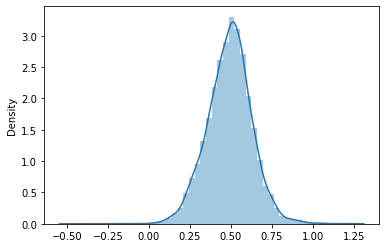

In [7]:
sns.distplot(po0)

<AxesSubplot:ylabel='Density'>

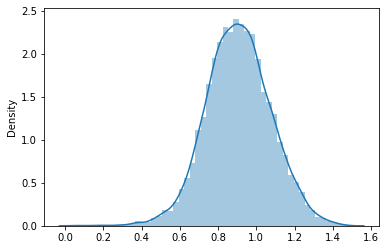

In [8]:
sns.distplot(po1)

<AxesSubplot:ylabel='Density'>

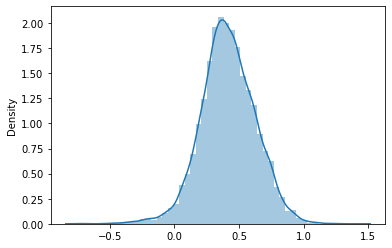

In [9]:
sns.distplot(po1-po0)

<AxesSubplot:ylabel='Density'>

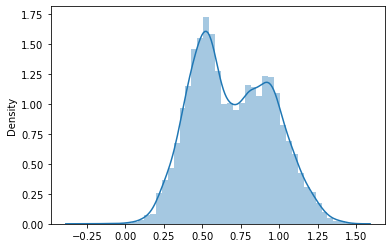

In [10]:
sns.distplot(Y_synth)

In [11]:
import numpy as np
from catenets.models.torch import TLearner
from src.iterpretability.explain import Explainer

X_train, W_train, Y_train = X[:9000], W_synth[:9000], Y_synth[:9000]

learner = TLearner(
    X_train.shape[1], binary_y=(len(np.unique(Y_train)) == 2), n_iter=100
)
learner.fit(X=X_train, y=Y_train, w=W_train)
explainer = Explainer(learner, feature_names=list(range(X_train.shape[1])))

/home/jonathan/anaconda3/envs/iterpretability/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:322: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
/home/jonathan/anaconda3/envs/iterpretability/lib/python3.9/site-packages/captum/attr/_core/lime.py:1102: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  warnings.warn(


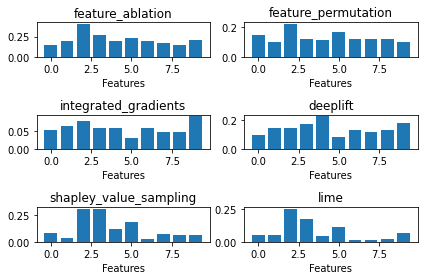

In [12]:
explainer.plot(X[-20:])